In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import yaml
import functions as fnc

In [20]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

In [73]:
# input_data = "../data/clean/de_credit_data_cleaned.csv"
# input_raw  = "../data/clean/de_credit_data_raw.csv"

In [21]:
# df_ = pd.read_csv(input_raw,sep=";")

df = pd.read_csv(config['data']['clean']['file'],sep=";")
# df = pd.read_csv(input_data,sep=";")



In [5]:
# df.info()
df.head()

,status_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account/bonds,present_employment,installment_rate,gender_status,other_debtors/guarantors,...,property,age,other_installment,housing,existing_credits,job_skill,number_of_dependents,telephone,foreign_worker,score
0,< 0,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee /official,1,yes,yes,1
1,< 200,48,existing credits paid back duly till now,radio/television,5951,< 100,1 - less than 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee /official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100,4 - less than 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0,42,existing credits paid back duly till now,furniture/equipment,7882,< 100,4 - less than 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee /official,2,none,yes,1
4,< 0,24,delay in paying off in the past,car (new),4870,< 100,1 - less than 4 years,3,male : single,none,...,unknown/no propert,53,none,for free,2,skilled employee /official,2,none,yes,2


In [7]:
df.describe()

,duration_in_month,credit_amount,installment_rate,present_residence,age,existing_credits,number_of_dependents,score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
df["existing_credits"].unique()
df.shape

In [ ]:
# df.groupby("score")["score"].count()
df.groupby("score")["age"].count()

In [ ]:
df0 = df.set_index("score").sort_index()
# df0.tail(100)
# df0[df0["foreign_worker"]== "yes"] 

All customers have opening credits


In [ ]:
df["status_checking_account"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["credit_history"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["purpose"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["savings_account/bonds"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["present_employment"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["other_debtors/guarantors"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["property"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["property"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["other_installment"].value_counts(normalize=True).mul(100).round(2)


In [ ]:
df["housing"].value_counts(normalize=True).mul(100).round(2)


In [ ]:
df["existing_credits"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["job_skill"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["number_of_dependents"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["telephone"].value_counts(normalize=True).mul(100).round(2)

In [ ]:
df["foreign_worker"].value_counts(normalize=True).mul(100).round(2)

<Axes: >

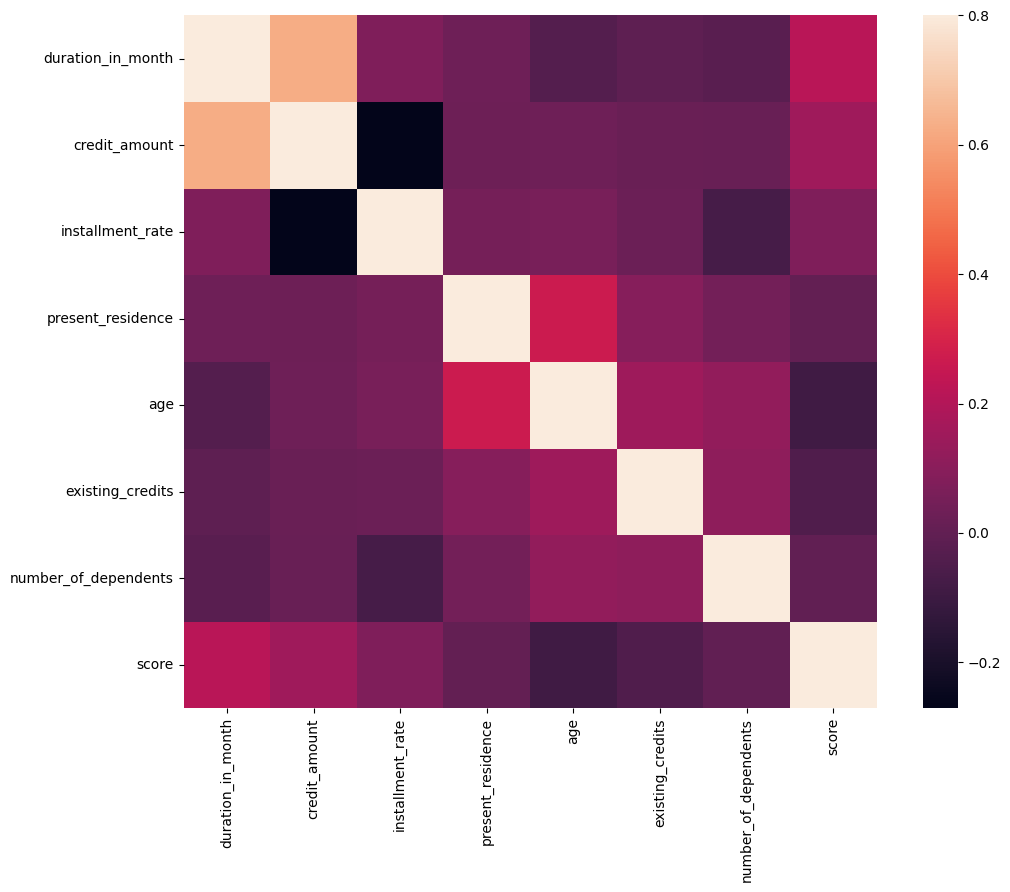

In [23]:
num_df = df.select_dtypes(include="number")
numdf_corr = num_df.corr()
# df.corr()
# df_corr = df.corr()
f, ax = plot.subplots(figsize=(12, 9))
sns.heatmap(numdf_corr, vmax=.8, square=True)

In [24]:
df1 = df.copy()
df1a = df1.groupby(["score","purpose"])[["duration_in_month", "credit_amount"]].agg(["median","mean"])
# df1.groupby("score")["purpose"].count().reset_index()



In [17]:
type(df["purpose"])

pandas.core.series.Series

In [36]:
norm_num_df = num_df.apply(fnc.normalize, axis = 0).mul(100).round(2)
norm_num_df

,duration_in_month,credit_amount,installment_rate,present_residence,age,existing_credits,number_of_dependents,score
0,2.94,5.06,100.00,100.00,85.71,33.33,0.0,0.0
1,64.71,31.37,33.33,33.33,5.36,0.00,0.0,100.0
2,11.76,10.16,33.33,66.67,53.57,0.00,100.0,0.0
3,55.88,41.99,33.33,100.00,46.43,0.00,100.0,0.0
4,29.41,25.42,66.67,100.00,60.71,33.33,100.0,100.0
...,...,...,...,...,...,...,...,...
995,11.76,8.18,66.67,100.00,21.43,0.00,0.0,0.0
996,38.24,19.85,100.00,100.00,37.50,0.00,0.0,0.0
997,11.76,3.05,100.00,100.00,33.93,0.00,0.0,0.0
998,60.29,8.78,100.00,100.00,7.14,0.00,0.0,100.0
